## Veri Manipülasyonu

Bir DataFrame, veri manipülasyonu ve analizi için kullanılan tablo benzeri bir veri yapısıdır. DataFrame'ler, Python'da popüler olan pandas kütüphanesi tarafından sağlanır. DataFrame'ler, verileri düzenli bir şekilde depolamak, görselleştirmek, filtrelemek, sıralamak, dönüştürmek ve analiz etmek için kullanılır. <br>

DataFrame'ler, iki boyutlu bir tablo olarak düşünülebilir, benzer şekilde sütun ve satırlardan oluşur. Her sütun, belirli bir veri türünü temsil eder ve sütunların her biri bir dizi veya seridir. Her satır, bir gözlemi veya bir veri noktasını temsil eder. <br>

DataFrame'ler, veri kaynaklarından (CSV dosyaları, veritabanları, Excel dosyaları vb.) veri almak için kullanılabilir veya veri analizi sonuçlarını saklamak ve işlemek için kullanılabilir. DataFrame'ler genellikle büyük miktardaki verileri etkili bir şekilde işlemek için optimize edilmiştir ve birçok veri manipülasyon işlemi için kullanılabilirler. 
![dataframe](Desktop/dataFrame.png) 

Öncelikle gerekli kütüphanelerimizi import edelim:

In [1]:
import pandas as pd
import numpy as np

Import ettiğimiz pandas kütüphanesi yardımı ile csv uzantılı veri dosyamızı 'df' isimli dataframe objesinin içine atayalım. ve head() fonksiyonu ile ilk 10 satırını görüntüleyelim. Eğer head() fonksiyonuna parametre vermezsek ilk 5 satırı bizi geri döner.

In [2]:
df = pd.read_csv('Desktop/googleplaystore.csv')
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


### Verileri Analize Hazırlama
Veri analizi veya manipülasyonu yapmadan önce veriyi hazırlamak önemlidir. Veri hazırlık aşamasında, veri setini temizlemek, düzenlemek ve uygun bir formata getirmek için çeşitli işlemler yapacağız.
 
#### 1)Veriye Genel Bakış: Veri setini anlamak için veriye genel bir göz atalım. Veri setinin boyutunu, sütunları, veri tiplerini, eksik değerleri ve aykırı değerleri anlamaya çalışalım:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


*Describe fonksiyonu sadece numerik veri içeren sütunlar hakkında özet bilgi sağlayabilir.

#### 2)Eksik Verilerin İncelenmesi: Eksik verileri tespit edelim ve bunlarla başa çıkmak için bir strateji belirleyelim. Eksik değerlerin neden kaynaklandığını anlamaya çalışalım ve eksik değerleri doldurma veya çıkarma gibi uygun bir yaklaşım kullanalım:

In [5]:
df.isnull().sum().sort_values(ascending = False)

Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
Last Updated         0
Genres               0
Price                0
Installs             0
Size                 0
Reviews              0
Category             0
App                  0
dtype: int64

Rating sütunundaki boş veriler silemeyeceğimiz kadar fazla çıktı. Bu durumda şunu yapacağız, 'Category' sütununa göre gruplama yapacağız ve kategorilerin rating puanlarının en çok tekrarlanan değerlerini bulacağız. Sonrasında yine kategoriye göre en çok tekrarlanan değer ile boş değerleri dolduracağız. 
Diğer sütunlardaki boş satır sayısı az olduğundan bunları silebiliriz.

Öncelikle Category sütunundaki unique değerleri bir görelim:

In [6]:
unique_values = df['Category'].unique()
unique_values

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

Category sütunundaki tiplere göre en çok tekrar eden rating değerlerini elde edelim:

In [7]:
mode_by_category = df.groupby('Category')[['Rating']].apply(lambda x: x.mode())
mode_by_category


,,Rating
Category,,
1.9,0,19.0
ART_AND_DESIGN,0,4.7
AUTO_AND_VEHICLES,0,4.6
BEAUTY,0,4.7
BOOKS_AND_REFERENCE,0,4.5
BUSINESS,0,4.4
COMICS,0,4.4
COMMUNICATION,0,4.3
DATING,0,4.1


In [10]:
mode_by_category= mode_by_category.reset_index()
mode_by_category

,index,Category,level_1,Rating
0,0,1.9,0,19.0
1,1,ART_AND_DESIGN,0,4.7
2,2,AUTO_AND_VEHICLES,0,4.6
3,3,BEAUTY,0,4.7
4,4,BOOKS_AND_REFERENCE,0,4.5
5,5,BUSINESS,0,4.4
6,6,COMICS,0,4.4
7,7,COMMUNICATION,0,4.3
8,8,DATING,0,4.1
9,9,EDUCATION,0,4.6


In [11]:
mode_by_category.drop(['index','level_1'], axis = 1, inplace= True)
mode_by_category

,Category,Rating
0,1.9,19.0
1,ART_AND_DESIGN,4.7
2,AUTO_AND_VEHICLES,4.6
3,BEAUTY,4.7
4,BOOKS_AND_REFERENCE,4.5
5,BUSINESS,4.4
6,COMICS,4.4
7,COMMUNICATION,4.3
8,DATING,4.1
9,EDUCATION,4.6


In [12]:
df['Rating'] = df.apply(lambda row: mode_by_category.loc[mode_by_category['Category'] == row['Category'], 'Rating'].values[0]
                        if pd.isna(row['Rating']) else row['Rating'], axis=1)
# Şimdi boş değerleri olan sütunları tekrar yazdıralım:
df.isnull().sum().sort_values(ascending = False)

Current Ver       8
Android Ver       3
Content Rating    1
Type              1
Last Updated      0
Genres            0
Price             0
Installs          0
Size              0
Reviews           0
Rating            0
Category          0
App               0
dtype: int64

Rating sütunundaki boş değerleri kategoriye göre en çok tekrar eden değerler ile doldurduk. Diğer boş verilen olduğu sütunlardan 'Current Ver', 'Android Ver', 'Content Rating' sütunlarındaki bilgileri bu analizlerde kullanmayacağım için bu sütunlara dokunmuyorum. Örnek olması açısından 'Type' sütunundaki boş veriyi sileceğim, öncesinde de ana verimdeki boş değerleri NaN'a çeviriyorum ki üzerlerinde işlem yapabileyim:

In [13]:
df.fillna(np.nan, inplace=True)
df['Type'].dropna(inplace=True)


#### 3)Aykırı Değerlerin İncelenmesi:Aykırı değerleri tespit edelim ve bunları analiz etmek için uygun bir yöntem seçelim. Aykırı değerlerin veriye nasıl etki edebileceğini anlamaya çalışalım ve bu değerlere düzeltme, değiştirme veya çıkarma gibi bir strateji uygulayalım:

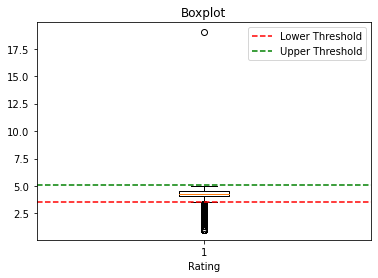

In [14]:
import matplotlib.pyplot as plt

# Boxplot çizdirin
plt.boxplot(df['Rating'])

# Grafik ayarlamalarını yapın
plt.xlabel('Rating')
plt.title('Boxplot')

# Aykırı değerleri tespit etmek için alt ve üst eşik değerlerini hesaplayın
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Aykırı değerleri belirlemek için alt ve üst eşik değerlerini gösterin
plt.axhline(y=lower_threshold, color='r', linestyle='--', label='Lower Threshold')
plt.axhline(y=upper_threshold, color='g', linestyle='--', label='Upper Threshold')

# Grafiği gösterin
plt.legend()
plt.show()

Grafikte görüldüğü gibi, üst limit değeri (yeşil çizgi) ile alt limit değeri (kırmızı çizgi) arasında olmayan aykırı değerlerimiz mevcut. Bu değeler arasında rating değeri 5'ten yüksek olamayacağı için, 5'ten yüksek değerleri görüntüleyelim ve verimizden silelim.

In [15]:
outline_values = df[df['Rating'] > 5]
outline_values

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
df = df.drop(outline_values.index)

In [17]:
df['Rating'].max()

5.0

'Rating' sütununda 5'ten büyük değer bırakmayarak aykırı değerleri temizlemiş olduk. <br>
Grafiğimizi yeniden çizdirelim:

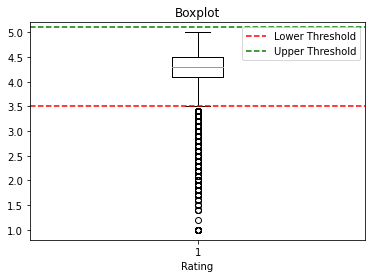

In [32]:
plt.boxplot(df['Rating'])

plt.xlabel('Rating')
plt.title('Boxplot')

Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

plt.axhline(y=lower_threshold, color='r', linestyle='--', label='Lower Threshold')
plt.axhline(y=upper_threshold, color='g', linestyle='--', label='Upper Threshold')

plt.legend()
plt.show()

#### 4)Veri Tipi Dönüşümleri: Öncelikle ana verimizdeki sütunlarda bulunan veri tiplerimizi görüntüleyelim ve analize hazır halde getirelim:

In [19]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

'Reviews' sütunundaki verilere göre yani uygulamaların gözden geçirilme sayılarına göre en popüler oyunları analiz edebiliriz. Aynı şekilde 'Installs' sütunundaki verilerle oranlayıp her bir oyun için gözden geçirilme sayısı/indirilme oranı parametresini hesaplayabiliriz. <br>
Bu işlemleri gerçekleştirebilmek için iki sütunun da veri tipinin int olması gerekiyor. Gerekli düzenlemeleri yapalım:

In [22]:
df['Reviews'] = df['Reviews'].astype(int)

In [23]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

'Installs' sütunundaki verilerin sonunda '+' işaretini veriden ayırıp sonrasında sayılardaki virgülleri de silip int tipine çevireceğiz:

In [26]:
df['Installs'] = df['Installs'].str.rstrip('+')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.5,3,9.5M,"1,000",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [28]:
df['Installs'] = df['Installs'].str.replace(',', '').astype(int)

In [29]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.5,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [30]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size               object
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Price sütununundaki değerleri de önce $ işaretinden kurtarıp sonra float tipine çevirelim:

In [37]:
df['Price'] = df['Price'].str.replace('$', '').astype(float)

In [39]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size               object
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### 5)Özellik Mühendisliği: Mevcut özelliklerden yeni özellikler türetmek için özellik mühendisliği tekniklerini kullanalım.

Ana verimizde 'Popularity' isimli yeni bir sütun oluşturalım. Bu sütunda Reviews/Installs formülü ile yeni bir parametre oluşturalım. Bu parametrede ölçülen şey, uygulamaları indiren kişileirn o uygulama hakkında değerlendirme yapıp yapmadığı. Değer ne kadar büyük olursa uygulamayı o kadar popüler kabul edeceğiz.

In [44]:
df['Popularity'] = df['Reviews'] / df['Installs']

In [45]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Popularity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.015900
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.001934
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.017502
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.004313
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.009670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,0.007600
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,0.040000
10838,Parkinson Exercices FR,MEDICAL,4.5,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,0.003000
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,0.114000


#### Veri Seçme

df isimli ana verilerimizi sakladığımız dataFrame'mimizden istediğimiz özelliklere göre veri seçme (select) işlemlerine örnekler verelim: <br> <br>
    -Genres sütunu getirelim:

In [47]:
df[['Genres']]

,Genres
0,Art & Design
1,Art & Design;Pretend Play
2,Art & Design
3,Art & Design
4,Art & Design;Creativity
...,...
10836,Education
10837,Education
10838,Medical
10839,Books & Reference


Genres ve Type sütunlarını çekelim:

In [48]:
df[['Genres', 'Type']]

,Genres,Type
0,Art & Design,Free
1,Art & Design;Pretend Play,Free
2,Art & Design,Free
3,Art & Design,Free
4,Art & Design;Creativity,Free
...,...,...
10836,Education,Free
10837,Education,Free
10838,Medical,Free
10839,Books & Reference,Free


Genres sütununun 20. satır ile 30. satır arasını çekelim:

In [55]:
df.loc[20:30, 'Genres']

20                       Art & Design
21                       Art & Design
22                       Art & Design
23    Art & Design;Action & Adventure
24                       Art & Design
25                       Art & Design
26            Art & Design;Creativity
27                       Art & Design
28                       Art & Design
29                       Art & Design
30                       Art & Design
Name: Genres, dtype: object

'App' sütunundaki her bir uygulamanın kaç tane unique değerinin olduğunu getirelim:

In [58]:
df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
ESPN                                                 7
Duolingo: Learn Languages Free                       7
                                                    ..
FL Tax-Verify                                        1
Ek Qissa He Quran Se (Qurani Waqiyat)                1
EU-Schwerbehinderung                                 1
Theme for Samsung Galaxy Note FE                     1
Four In A Line Free                                  1
Name: App, Length: 9659, dtype: int64

#### Veri Filtreleme 

Belirli bir koşula uyan satırları veya sütunları filtreleyelim:
 <br> <br>
    -Rating sütununda 4 puandan yüksek alan uygulamaları getirelim:

In [59]:
df[df['Rating'] > 4.0 ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Popularity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.015900
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.017502
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.004313
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.009670
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,0.003340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,0.007600
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,0.040000
10838,Parkinson Exercices FR,MEDICAL,4.5,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,0.003000
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,0.114000


Rating sütununda 4.0 puandan yüksek ve 4.6 puandan düşük olan uygulamaları getirelim:

In [61]:
df[(df['Rating'] > 4.0) & (df['Rating'] < 4.6) ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Popularity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.015900
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.004313
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.009670
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,0.003340
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,0.036815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.4,0,9.6,10,Free,0.0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up,0.000000
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,0.007600
10838,Parkinson Exercices FR,MEDICAL,4.5,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,0.003000
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,0.114000


'App' sütununda içerisinde 'Editor' kelimesi geçen satırları getirelim:

In [64]:
df[df['App'].str.contains('Editor')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Popularity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.015900
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,0.003560
11,Name Art Photo Editor - Focus n Filters,ART_AND_DESIGN,4.4,8788,12,1000000,Free,0.0,Everyone,Art & Design,"July 31, 2018",1.0.15,4.0 and up,0.008788
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20,10000000,Free,0.0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up,0.004483
21,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12,100000,Free,0.0,Everyone,Art & Design,"March 20, 2018",1.1,4.0.3 and up,0.006540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10022,Beard Live Camera Photo Editor,BEAUTY,4.7,900,30,5000,Free,0.0,Everyone,Beauty,"March 25, 2018",1.1,4.0.3 and up,0.180000
10118,FilterGrid - Cam&Photo Editor,PHOTOGRAPHY,4.6,126338,9.6,1000000,Free,0.0,Everyone,Photography,"March 15, 2017",2.0.5,4.0 and up,0.126338
10509,PIP Selfie Camera Photo Editor,PHOTOGRAPHY,4.4,156322,Varies with device,10000000,Free,0.0,Everyone,Photography,"February 1, 2018",Varies with device,Varies with device,0.015632
10707,Photo Editor Collage Maker Pro,PHOTOGRAPHY,4.5,1519671,Varies with device,100000000,Free,0.0,Everyone,Photography,"February 1, 2018",Varies with device,Varies with device,0.015197


#### Veri Gruplama - Sıralama - Özetleme

Genres sütununda göre rating ortalaması getirelim:

In [66]:
df.groupby('Genres')[['Rating']].mean()

,Rating
Genres,
Action,4.289589
Action;Action & Adventure,4.311765
Adventure,4.189333
Adventure;Action & Adventure,4.423077
Adventure;Brain Games,4.600000
...,...
Video Players & Editors,4.084393
Video Players & Editors;Creativity,4.100000
Video Players & Editors;Music & Video,4.000000


Genres sütununda göre rating ortalamalarını sıralayalım:

In [68]:
df.groupby('Genres')[['Rating']].mean().sort_values(by = 'Rating',ascending = False)

,Rating
Genres,
Comics;Creativity,4.80000
Board;Pretend Play,4.80000
Health & Fitness;Education,4.70000
Adventure;Brain Games,4.60000
Strategy;Action & Adventure,4.60000
...,...
Educational;Creativity,3.96000
Educational,3.92973
Health & Fitness;Action & Adventure,3.90000


Popülarity'si en yüksek olan ilk beş uygulamanın adını ve Installs bilgisini getirelim:

In [70]:
df.nlargest(5, 'Popularity')[['App','Popularity', 'Installs']]

,App,Popularity,Installs
2454,KBA-EZ Health Guide,4.0,1
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,4.0,1
5812,AX Watch for WatchMaker,2.0,1
5917,Ra Ga Ba,2.0,1
8591,DN Blog,2.0,10


'Rating''i 3.0'dan yüksek olan uygulamaların kategorisine göre indirilme ortalamalarını bulalım:

In [73]:
df[df['Rating'] > 3.0 ].groupby('Category')[['Installs']].mean()

,Installs
Category,
ART_AND_DESIGN,1.912894e+06
AUTO_AND_VEHICLES,6.478550e+05
BEAUTY,5.131519e+05
BOOKS_AND_REFERENCE,8.354194e+06
BUSINESS,2.289709e+06
COMICS,9.497595e+05
COMMUNICATION,8.614019e+07
DATING,1.221251e+06
EDUCATION,5.586231e+06


In [74]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Popularity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.015900
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.001934
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.017502
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.004313
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.009670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,0.007600
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,0.040000
10838,Parkinson Exercices FR,MEDICAL,4.5,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,0.003000
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,0.114000


#### Veri Görselleştirme

Verilerimizi grafiklerle okunması daha kolay hale getirelim. Örneğin uygulamaların rating'i ile indirilme sayısı arasında bir ilişki var mı diye bakalım:

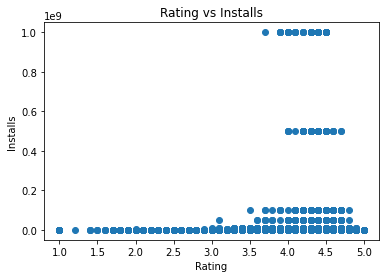

In [78]:
plt.scatter(df['Rating'], df['Installs'])
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.title('Rating vs Installs')
plt.show()

Elimizdeki verilerden böyle bir ilişkinin varlığını kanıtlayamadık. <br>
Şimdi de Rating ile Reviews arasında bir ilişki var mı diye bakalım:

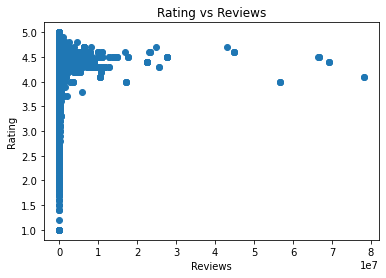

In [80]:
plt.scatter(df['Reviews'], df['Rating'])
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.title('Rating vs Reviews')
plt.show()

Bir uygulamanın puanı arttıkça değerlendirmeleri yani aldığı yorum sayısı artıyor. <br>
Şimdi de uygulamanın fiyatı ile indirilme sayısı arasındaki ilişkiye bakalım:

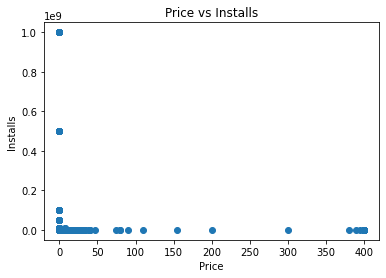

In [83]:
plt.scatter(df['Price'], df['Installs'])
plt.xlabel('Price')
plt.ylabel('Installs')
plt.title('Price vs Installs')
plt.show()

Tahmin ettiğimiz gibi,bir uygulamanın fiyatı arttıkça indirmeleri azalıyor. <br>
Şimdi de uygulamanın fiyatı ile rating puanı arasındaki ilişkiye bakalım:

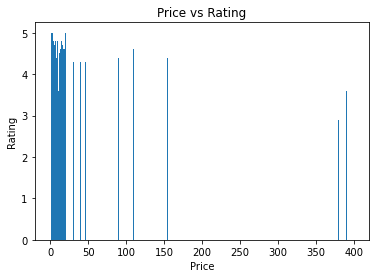

In [84]:
plt.bar(df['Price'], df['Rating'])
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Price vs Rating')
plt.show()

Bir uygulamanın fiyatı arttıkça rating'leri azalıyor. <br>